In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import scipy.stats as si

In [117]:
#QUESTION 1
# Step 1: Download Monthly Stock Price Data
# Define the stock ticker for Cisco Systems Inc.
ticker = 'CSCO'

# Set the start and end dates for the period we want to get data for
start_date = '2015-01-01'
end_date = '2019-12-31'

# Download the stock price data from Yahoo Finance
# We use the `period` parameter to specify monthly data ('1mo')
csco_stock_data = yf.download(ticker, start=start_date, end=end_date, interval='1mo')

# Display the first few rows of the dataframe
print(csco_stock_data.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-01  27.860001  28.700001  26.320000  26.370001  19.908741  659832000
2015-02-01  26.389999  29.990000  25.920000  29.510000  22.432575  614928400
2015-03-01  29.360001  30.309999  26.620001  27.530001  20.927444  630441700
2015-04-01  27.309999  29.330000  26.840000  28.830000  22.083384  489815600
2015-05-01  28.809999  29.900000  28.690001  29.309999  22.451056  515367400


In [118]:
# Calculate the monthly logarithmic returns
csco_stock_data['Log_Returns'] = np.log(csco_stock_data['Adj Close'] / csco_stock_data['Adj Close'].shift(1))

# Calculate the annualised return
# There are approximately 12 trading months in a year
annualised_return = csco_stock_data['Log_Returns'].mean() * 12

print(f"The annualised return is: {annualised_return * 100:.2f}%")


The annualised return is: 15.36%


In [119]:
# Calculate the annualised volatility
# The standard deviation of log returns is the volatility
# We annualise it by multiplying by the square root of the number of trading months
annualised_volatility = csco_stock_data['Log_Returns'].std() * np.sqrt(12)

print(f"The annualised volatility is: {annualised_volatility * 100:.2f}%")

The annualised volatility is: 21.85%


In [134]:
pip install yesg

Note: you may need to restart the kernel to use updated packages.


In [135]:
import yesg

In [130]:
pip install meteostat

  Obtaining dependency information for meteostat from https://files.pythonhosted.org/packages/23/93/0d277de2b38238072b850e33fbd94e230951f2e5d7ac140ae221a05215b0/meteostat-1.6.7-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [140]:
ESG = yesg.get_historic_esg('CSCO')
ESG

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-09-01,80.00,86.00,79.00,72.00
2014-10-01,78.00,86.00,79.00,72.00
2014-11-01,80.00,86.00,79.00,72.00
2014-12-01,80.00,86.00,79.00,72.00
2015-01-01,80.00,86.00,79.00,72.00
...,...,...,...,...
2022-04-01,NaN,NaN,NaN,NaN
2022-05-01,11.82,0.03,5.59,6.20
2022-06-01,NaN,NaN,NaN,NaN


In [137]:
ESG.new = pd.DataFrame.dropna(ESG)
ESG.new

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-09-01,80.00,86.00,79.00,72.00
2014-10-01,78.00,86.00,79.00,72.00
2014-11-01,80.00,86.00,79.00,72.00
2014-12-01,80.00,86.00,79.00,72.00
2015-01-01,80.00,86.00,79.00,72.00
...,...,...,...,...
2021-05-01,12.45,0.54,5.84,6.08
2021-09-01,11.42,0.03,5.56,5.83
2022-02-01,11.83,0.03,5.59,6.21


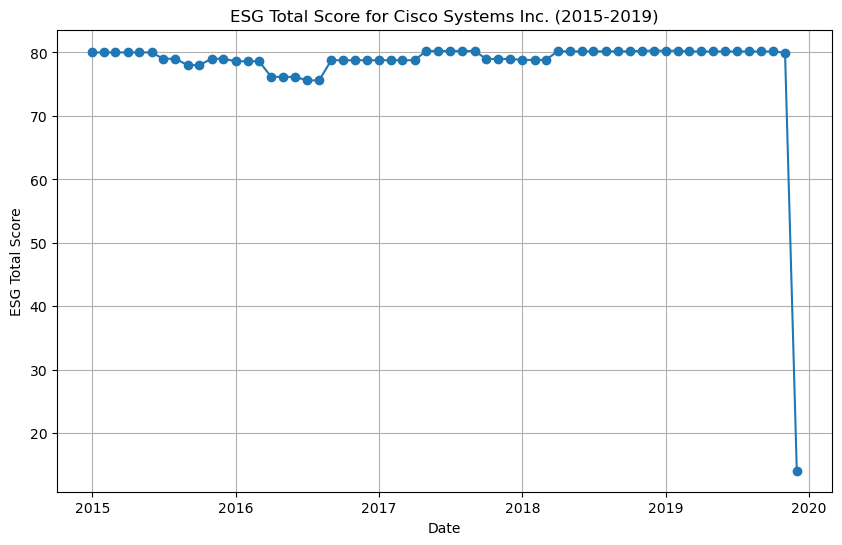

In [185]:
import pandas as pd

# Convert the index to datetime if it's not already
ESG.index = pd.to_datetime(ESG.index)

# Define start and end dates
start_date = '2015-01-01'
end_date = '2019-12-31'

# Filter the DataFrame for the desired date range
ESG_filtered = ESG.loc[start_date:end_date]

# Now ESG_filtered contains the data between January 1, 2015, and December 31, 2019
# You can now handle missing values and plot this data

# Fill missing values using forward-fill method
ESG_filled = ESG_filtered.fillna(method='ffill')

# Plot the 'Total-Score' column
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ESG_filled.index, ESG_filled['Total-Score'], marker='o')
plt.title('ESG Total Score for Cisco Systems Inc. (2015-2019)')
plt.xlabel('Date')
plt.ylabel('ESG Total Score')
plt.grid(True)
plt.show()

In [188]:
# Download stock data for Cisco Systems Inc. (CSCO)
csco_stock = yf.download('CSCO', start='2015-01-01', end='2019-12-31', interval='1mo')
csco_stock = csco_stock.dropna()  # Remove any NaN rows


[*********************100%%**********************]  1 of 1 completed


In [189]:
print(ESG.columns)
# Print the column names of csco_stock DataFrame to verify
print(csco_stock.columns)

Index(['Total-Score', 'E-Score', 'S-Score', 'G-Score', 'LogRet'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [190]:
# Assuming 'Total-Score' is the column representing closing prices:
ESG['LogRet'] = np.log(ESG['Total-Score'] / ESG['Total-Score'].shift(1))
csco_stock['LogRet'] = np.log(csco_stock['Close'] / csco_stock['Close'].shift(1))

In [191]:

# Calculate the correlation between ESG and Cisco stock log returns
correlation = ESG['LogRet'].corr(csco_stock['LogRet'])

In [192]:
# Print the correlation result
print(f"The correlation between the log returns is: {correlation}")

The correlation between the log returns is: -0.09970490406630916


In [193]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [194]:
# QUESTION 2(CDD and HDD for BEIJING and JUNE)
# For the Northern Hemisphere

In [195]:
start = datetime(2022, 4, 1)
end = datetime(2022, 9, 30)

In [196]:
location = Point( 39.916668, 116.383331, 43.5)

In [207]:
data = Daily(location, start, end)
data = data.fetch()

In [208]:
#Calculating Cooling Degree Days (CDD)
T_base = 18
cdds = [max(temp - T_base, 0) for temp in data.tavg]

In [221]:
# Function to calculate CDD and HDD
def calculate_degree_days(location, year):
    # Set the base temperature
    T_base = 18
    
    # Define start and end dates for the warm period (CDD) and the cold period (HDD)
    warm_start = datetime(2022, 4, 1)
    warm_end = datetime(2022, 9, 30)
    cold_start_1 = datetime(2022, 1, 1)
    cold_end_1 = datetime(2022, 3, 31)
    cold_start_2 = datetime(2022, 10, 1)
    cold_end_2 = datetime(2022, 12, 31)
    
    # Fetch data for the warm period
    data_warm = Daily(location, warm_start, warm_end)
    data_warm = data_warm.fetch()
    
    # Fetch data for the cold period
    data_cold_1 = Daily(location, cold_start_1, cold_end_1)
    data_cold_1 = data_cold_1.fetch()
    data_cold_2 = Daily(location, cold_start_2, cold_end_2)
    data_cold_2 = data_cold_2.fetch()
    

    # Calculate CDD
    cdds = [max(temp - T_base, 0) for temp in data_warm['tavg']]
    total_cdd = np.sum(cdds)

    # Calculate HDD for the first cold period
    hdds_1 = [max(T_base - temp, 0) for temp in data_cold_1['tavg']]
    total_hdd_1 = np.sum(hdds_1)

    # Calculate HDD for the second cold period
    hdds_2 = [max(T_base - temp, 0) for temp in data_cold_2['tavg']]
    total_hdd_2 = np.sum(hdds_2)

    return total_cdd, total_hdd_1, total_hdd_2
    
# Define the location using latitude, longitude, and altitude
location = Point(39.916668, 116.383331, 43.5)

# Calculate CDD and HDD for the year 2022
cdd, hdd_jan_mar, hdd_oct_dec = calculate_degree_days(location, 2022)

In [223]:
print("CDD for April to September is", cdd)
print("HDD for January to March is", hdd_jan_mar)
print("HDD for October to December is", hdd_oct_dec)

CDD for April to September is 1023.7999999999997
HDD for January to March is 1524.6999999999998
HDD for October to December is 1228.1999999999998


In [217]:
# QUESTION 3: Critical Analysis on Cryptocurrencies and Environment in word